# DCT

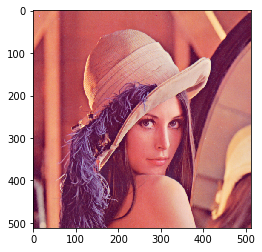

In [34]:
# Load lena

import urllib.request
from matplotlib import pyplot as plt
import numpy as np
import cv2

%matplotlib inline
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BRG = cv2.imdecode(arr,-1)
RGB = cv2.cvtColor(BRG, cv2.COLOR_BGR2RGB)
plt.imshow(RGB)

In [35]:
from scipy import fftpack

# Forward and backward DCT wrappers

def forward_2d_dct(img):
    """ Get 2D Cosine Transform of Image
    """
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T
    # https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.fftpack.dct.html
    return fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')

def inverse_2d_dct(coefficients):
    """ Get 2D Inverse Cosine Transform of Image
    """
    # https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.fftpack.idct.html
    return fftpack.idct(fftpack.idct(coefficients.T, norm='ortho').T, norm='ortho')

In [36]:
# Color 2D-DCT is the 2D-DCT of each component
components = ('r','g','b')
dct = [None]*3
for i,com in enumerate(components):
    print("{} ".format(i), end='')
    dct[i] = forward_2d_dct(RGB[:,:,i])

0 1 2 

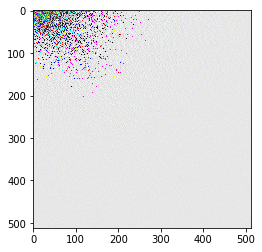

In [37]:
# View DCT coefs
view_dct = np.empty(RGB.shape)
for i,com in enumerate(components):
    view_dct[:,:,i] = dct[i][:,:]
plt.imshow((view_dct - view_dct.min())/(view_dct.max() - view_dct.min())*255)

100 coefficients

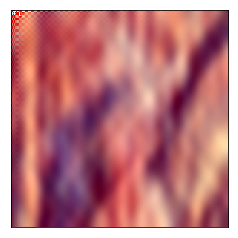

200 coefficients

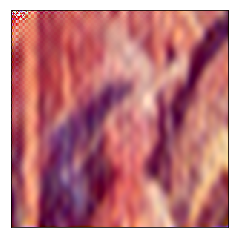

300 coefficients

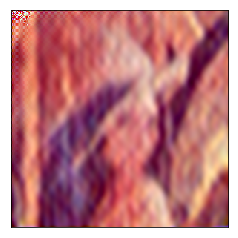

400 coefficients

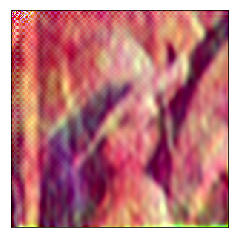

500 coefficients

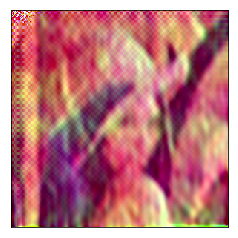

600 coefficients

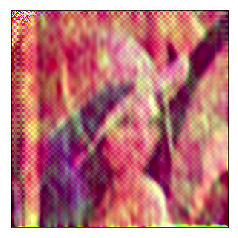

700 coefficients

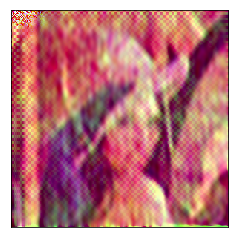

800 coefficients

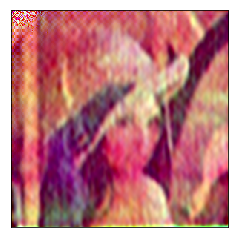

900 coefficients

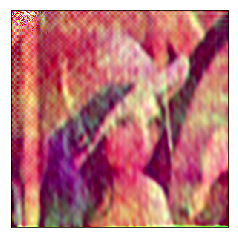

1000 coefficients

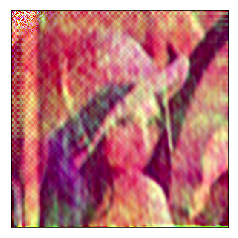

1100 coefficients

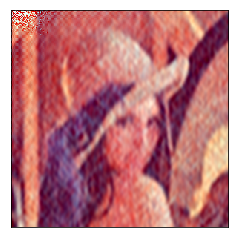

1200 coefficients

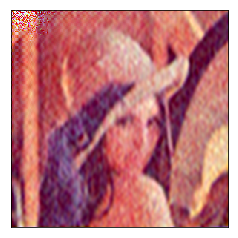

1300 coefficients

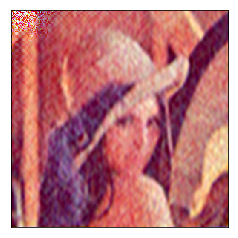

1400 coefficients

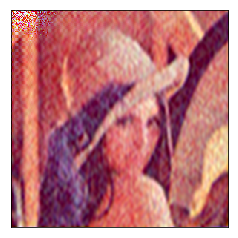

1500 coefficients

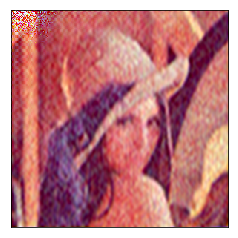

1600 coefficients

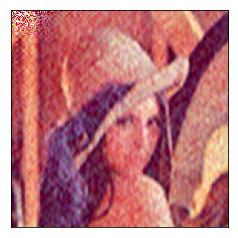

1700 coefficients

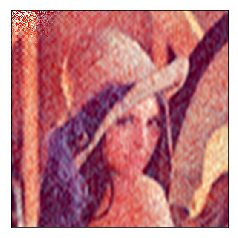

1800 coefficients

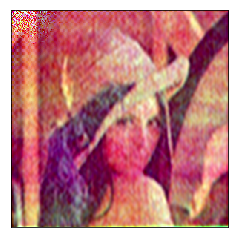

1900 coefficients

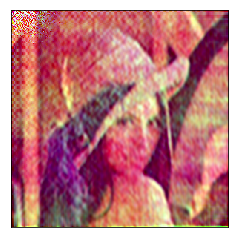

2000 coefficients

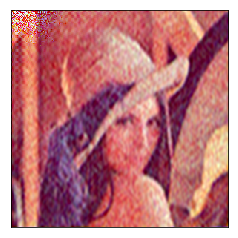

2100 coefficients

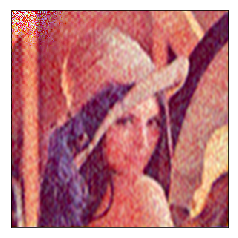

2200 coefficients

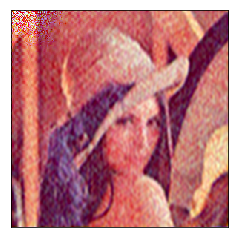

2300 coefficients

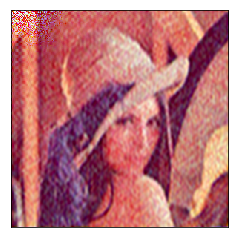

2400 coefficients

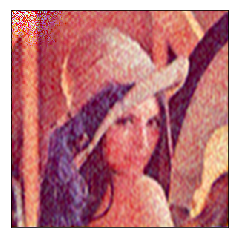

2500 coefficients

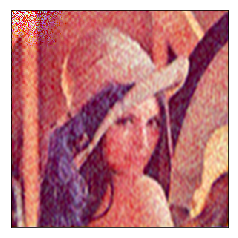

2600 coefficients

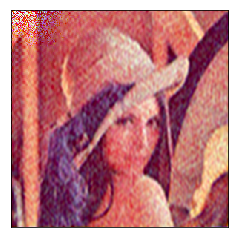

2700 coefficients

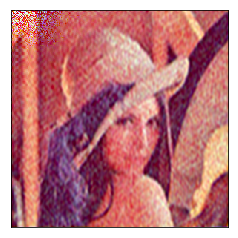

2800 coefficients

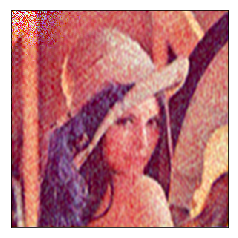

2900 coefficients

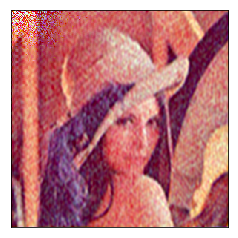

3000 coefficients

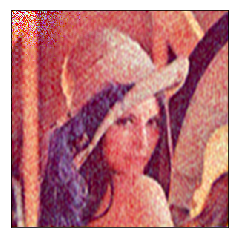

3100 coefficients

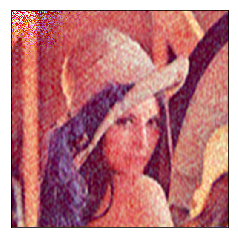

3200 coefficients

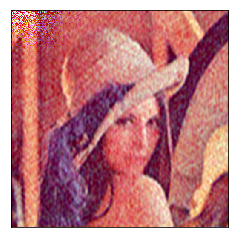

In [38]:
# Reconstruct with biggest DCT coefs
N = 100 # Step size (in coeffs) for each reconstruction
for k in range(32): # Up to 32 reconstructions
    
    coeffs_indexes = np.empty((RGB.shape[0] * RGB.shape[1]), dtype='float, int, int')
    for i in range(RGB.shape[0]):
        for j in range(RGB.shape[1]):
            coeffs_indexes[i*RGB.shape[1]+j] = (np.abs(dct[0][i][j]), i, j)
    
    # https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.sort.html
    sorted = np.sort(coeffs_indexes, axis = -1)[::-1]
    
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html
    x_coords = np.empty((k+1)*N, dtype='int')
    y_coords = np.empty((k+1)*N, dtype='int')
    for kk in range((k+1)*N):
        x_coords[kk] = sorted[kk][1]
        y_coords[kk] = sorted[kk][2]

    recons = np.empty(RGB.shape)
    
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html
    dct_copy = np.zeros(dct[0].shape)

    dct_copy[x_coords, y_coords] = dct[0][x_coords, y_coords]
    recons_ = inverse_2d_dct(dct_copy)
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.clip.html
    recons[:,:,0] = recons_[:,:].clip(0,255)
    
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty_like.html
    dct_copy = np.empty_like(dct[1])
    dct_copy[x_coords, y_coords] = dct[1][x_coords, y_coords]
    recons_ = inverse_2d_dct(dct_copy)
    recons[:,:,1] = recons_[:,:].clip(0,255)

    dct_copy = np.empty_like(dct[2])
    dct_copy[x_coords, y_coords] = dct[2][x_coords, y_coords]
    recons_ = inverse_2d_dct(dct_copy)
    recons[:,:,2] = recons_[:,:].clip(0,255)
    
    plt.imshow(recons.astype('uint8'))
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);
    print("{} coefficients".format((k+1)*N), end='')
    plt.show()


## $8\times 8$ DCT

* DCT exhibits a bad performance when applied to high resolution images, but locally it works pretty well. For this reason, most DCT-based image/video codecs divide the images in blocks (typically of 8x8 pixels) and apply the DCT to each block, independently. Let's see the basis functions (the synthesys filters's response to a Delta) of the 2D-DCT.

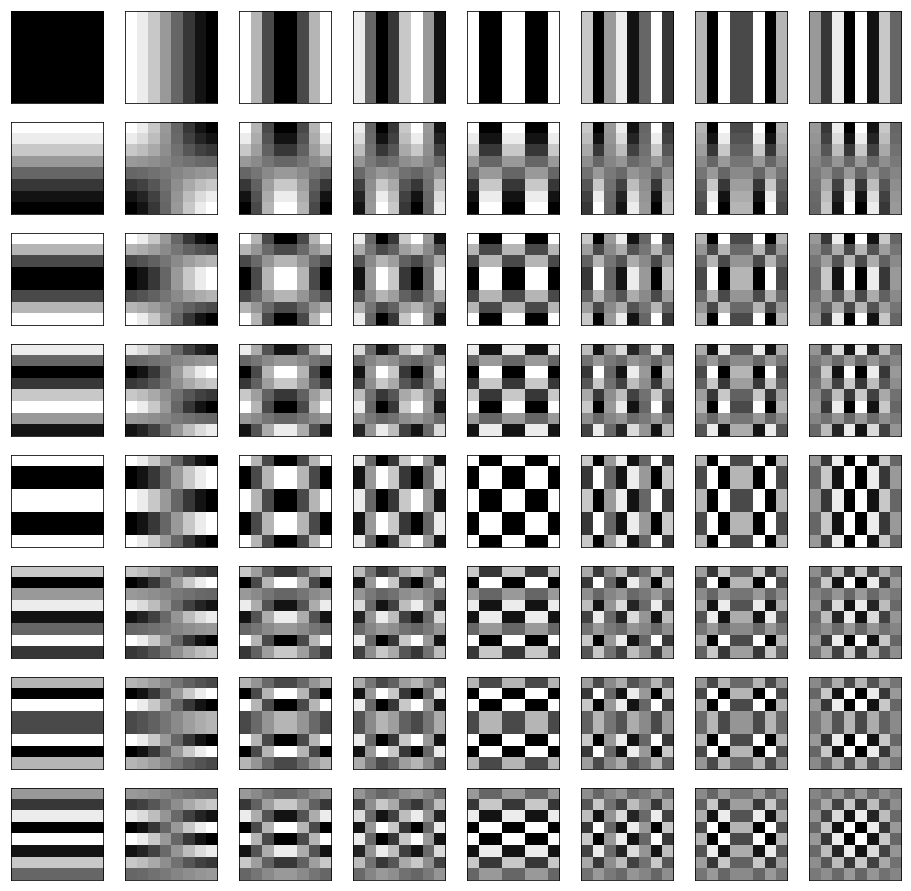

In [39]:
fig = plt.figure(figsize=(16, 16))
for i in range(8):
    for j in range(8):
        dct_copy = np.zeros((8, 8))

        dct_copy[i][j] = 1.0
        recons = inverse_2d_dct(dct_copy)
        
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255

        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

Now with more resolution:

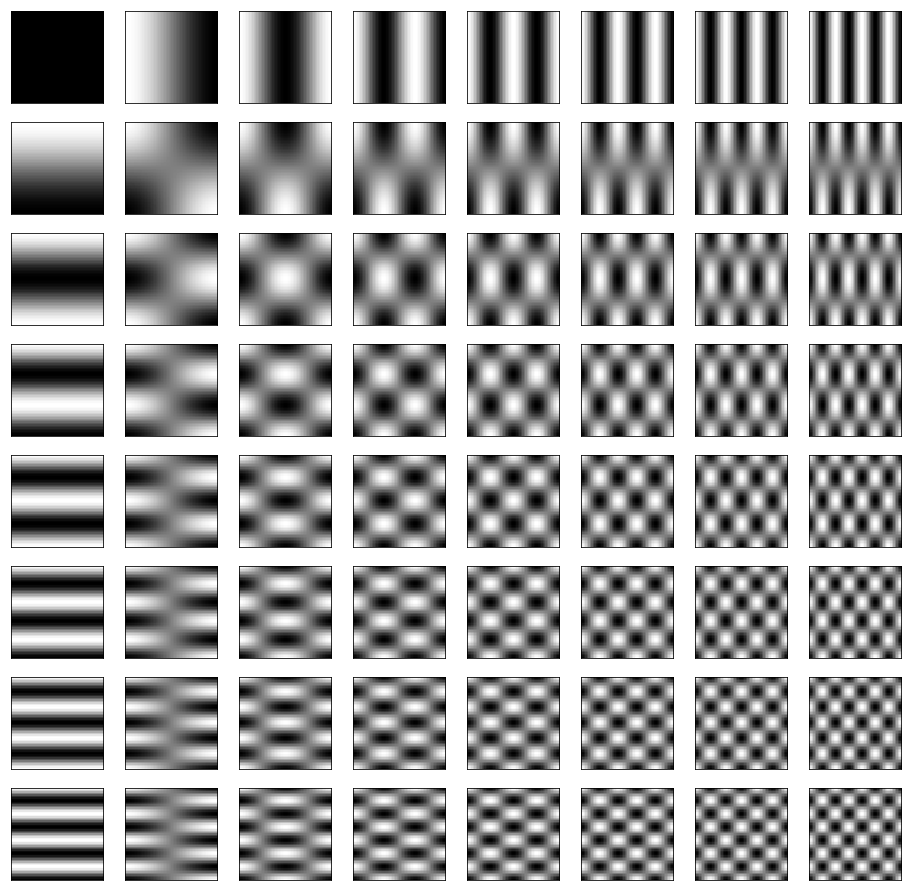

In [69]:
fig = plt.figure(figsize=(16, 16))
for i in range(8):
    for j in range(8):
        dct_copy = np.zeros((64, 64))

        dct_copy[i][j] = 1.0
        recons = inverse_2d_dct(dct_copy)
        
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255

        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);